# **Загрузка данных**

In [0]:
from glob import glob
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [0]:
data_path = "data/population.xls"
# train_data = pathlib.Path("data/population.xls")
data = pd.read_excel(data_path)

In [0]:
data = data.drop(['Unnamed: 4', 'Unnamed: 5'], axis = 1)

In [0]:
data = data.rename(columns={'Обновлено 19.04.2019': 'year', 'Unnamed: 1': 'all_population', 'Unnamed: 2': 'town', 'Unnamed: 3': 'country'})

In [5]:
sliced_data = data.loc[11:56]
print(sliced_data.describe())

        year  all_population   town  country
count     46            46.0   46.0     46.0
unique    46            41.0   43.0     41.0
top     1983           148.3  104.9     38.9
freq       1             2.0    2.0      2.0


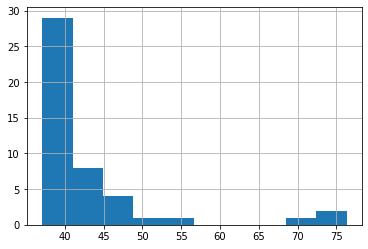

In [6]:
sliced_data['country'].hist(grid=True)

In [7]:
sliced_data['all_population'].value_counts().head()

148.3    2
142.9    2
146.3    2
142.8    2
146.8    2
Name: all_population, dtype: int64

In [8]:
# X = np.array([list(sliced_data['town']), list(sliced_data['country'])]).reshape(-1, 2)
X = np.array(list(sliced_data['town'])).reshape(-1, 1)
# y = np.array(list(sliced_data['all_population'])).reshape(-1, 1)
y = np.array(sliced_data['all_population']).reshape(-1, 1)
print(X.shape, y.shape)

(46, 1) (46, 1)


In [0]:
past_data = 10
future_data = 5

In [10]:
start = past_data
end = len(X) - future_data
end

41

In [0]:
# data_X[(start - past_data):(start)]

In [12]:
new_df = []
for i in tqdm(range(start, end)):
  past_days = list(X[(i - past_data):(i)])
  future_days = list(y[i: (i + future_data)])
  past_days += future_days
  new_df.append(past_days)

print(len(new_df[0]))

100%|██████████| 31/31 [00:00<00:00, 53551.66it/s]

15


In [0]:
past_columns = []
for i in range(past_data):
  past_columns.append(f'past_{i}')

future_columns = []
for i in range(future_data):
  future_columns.append(f'future_{i}')

In [0]:
transformed_df = pd.DataFrame(new_df, columns=(past_columns + future_columns))

In [0]:
X = transformed_df[past_columns][:-1]
y = transformed_df[future_columns][:-1]

X_test = transformed_df[past_columns][-1:]
y_test = transformed_df[future_columns][-1:]

In [16]:
print(X.head(), y.head())

   past_0  past_1  past_2  past_3  ...  past_6  past_7  past_8  past_9
0  [15.5]  [16.4]  [36.3]  [61.1]  ...  [83.6]  [85.4]  [87.1]  [88.9]
1  [16.4]  [36.3]  [61.1]  [80.6]  ...  [85.4]  [87.1]  [88.9]  [90.6]
2  [36.3]  [61.1]  [80.6]  [82.0]  ...  [87.1]  [88.9]  [90.6]  [92.1]
3  [61.1]  [80.6]  [82.0]  [83.6]  ...  [88.9]  [90.6]  [92.1]  [93.5]
4  [80.6]  [82.0]  [83.6]  [85.4]  ...  [90.6]  [92.1]  [93.5]  [94.9]

[5 rows x 10 columns]   future_0 future_1 future_2 future_3 future_4
0  [134.5]  [135.5]  [136.5]  [137.4]  [138.1]
1  [135.5]  [136.5]  [137.4]  [138.1]  [138.8]
2  [136.5]  [137.4]  [138.1]  [138.8]  [139.6]
3  [137.4]  [138.1]  [138.8]  [139.6]  [140.5]
4  [138.1]  [138.8]  [139.6]  [140.5]  [141.6]


In [0]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [18]:
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction = LR.predict(X_test)

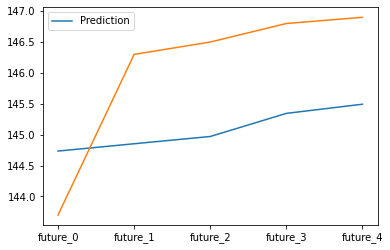

In [20]:
plt.plot(prediction[0], label='Prediction')
plt.plot(y_test.iloc[0])
plt.legend()

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error


KNN = KNeighborsRegressor(leaf_size=100, n_neighbors=3)

In [22]:
KNN.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=100, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

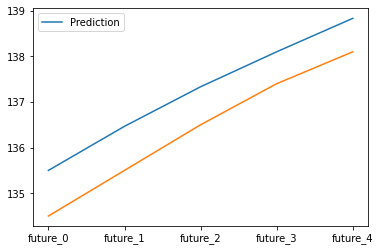

In [23]:
prd = KNN.predict(X)
plt.plot(prd[0], label='Prediction')
plt.plot(y.iloc[0])
plt.legend()

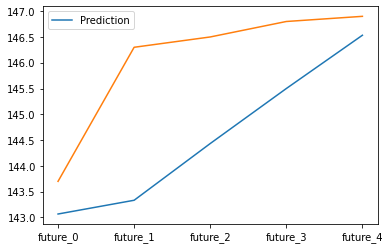

In [24]:
prediction2 = KNN.predict(X_test)
# overfitting
plt.plot(prediction2[0], label='Prediction')
plt.plot(y_test.iloc[0])
plt.legend()

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(prediction2[0], y_test.iloc[0])

1.4666666666666628

24.711453642789763

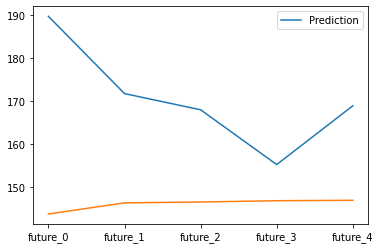

In [26]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state=42, max_iter=700, verbose=0, hidden_layer_sizes=500)
MLP.fit(X, y)
prediction3 = MLP.predict(X_test)
plt.plot(prediction3[0], label='Prediction')
plt.plot(y_test.iloc[0])
plt.legend()
mean_absolute_error(prediction3[0], y_test.iloc[0])

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

params = {
    "n_estimators": [100, 130, 150],
    "max_depth": [3, 5, 7],
    "criterion": ["mae", "mse"],
}
GCV = GridSearchCV(RFR, params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)

In [28]:
GCV.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [29]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 7, 'n_estimators': 100}

In [30]:
GCV.best_score_

-1.7073800000000077

2.6754999999999427


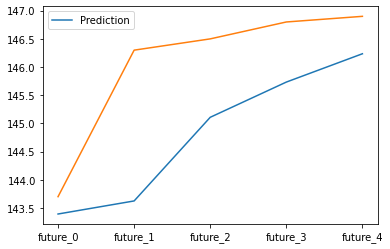

In [31]:
from sklearn.metrics import max_error

pred = GCV.best_estimator_.predict(X_test)
print(max_error(pred[0], y_test.iloc[0]))
plt.plot(pred[0], label='Prediction')
plt.plot(y_test.iloc[0])
plt.legend()